In [6]:
import sys
import os
home=os.getcwd()
sys.path.append(home+'/Functions')
from ChargeDataSet import *
from MS1IDs import *
from NumpyMSPeaksIdentification import *
from PeaksIdent import *
from PeaksFindDif import *
from ShowDF import *
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from JoiningSpectra import *
from SamplingSpectra import *
from SpectralList import *
from featDet import *

In [2]:
DataSetName='12111.mzML'

In [3]:
DataSet=ChargeDataSet(DataSetName)

In [4]:
MS1IDVec=MS1IDs(DataSet)

In [7]:
SpectraList=SpectralList(DataSet,MS1IDVec,RTslice=10)

In [8]:
SpectraPeaks=featDet(SpectraList,ZeroInt=1e2,min_mz=200,max_mz=300)

In [9]:
ShowDF(pd.DataFrame(SpectraPeaks))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,186.165,100.174,764775,0.295058,1584.92,0,0,0,6.13136e+10,0,15.0178,4.16049e+07,99.9986,560.847,-114.357,486.688
1,196.364,1.78371,8149,0.0509087,259.256,0,0,0,2.47994e+08,0,7.76708,5.58408e+06,191.969,219.954,191.013,201.716
2,199.98,0.00393764,324,0.000566831,2.83443,0,0,0,496183,0,0.034841,4863.96,199.976,200.044,199.968,199.992
3,200.003,0.00125352,70,0.000396881,1.98437,0,0,0,113832,0,0.000954591,4730.49,200.001,200.007,199.999,200.007
4,200.003,0.00123494,6,0.00203286,10.1641,-40,0,1,5590.51,0,0.000849103,1666.31,200.002,200.006,200,200.007
5,200.016,0.00121848,410,0.00015573,0.778589,0,0,0,705771,0,0.00425062,7856.65,200.009,200.019,200.012,200.019
6,200.027,0.00120837,480,0.000142636,0.713085,0,0,0,721972,0,0.000847953,6114.43,200.024,200.03,200.024,200.031
7,200.044,0.0032123,138,0.000714302,3.57072,0,0,0,315419,0,0.00584325,7333.41,200.036,200.05,200.035,200.054
8,200.048,0.000824955,4,0.00240924,12.0433,-40,0,1,3886.59,0,0.000849379,1293.01,200.047,200.049,200.046,200.051
9,200.155,0.0356194,1164,0.00269365,13.4578,0,0,0,8.15455e+06,0,0.170813,562916,199.97,200.242,200.048,200.262


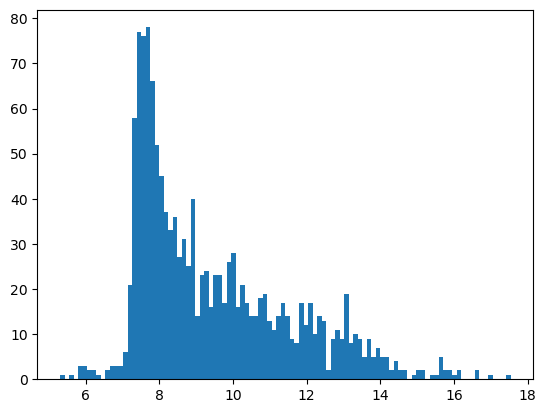

In [11]:
plt.hist(np.log(SpectraPeaks[:,11]),bins=100)
plt.show()